In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/marcus/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython import display
import time

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder\
    .master('local[*]')\
    .appName('WordCloud')\
    .getOrCreate()

In [ ]:
## Tratamento das palavras
## substituindo http por vazio, @ por vazio, rt por vazio
def trata_tweets(df):
    words = df \
        .select(f.explode(f.split(f.lower('_c0'), " ")) \
        .alias("word")) \
        .withColumn('word', f.regexp_replace('word', r'http\S+', '')) \
        .withColumn('word', f.regexp_replace('word', r'@\w+', '')) \
        .withColumn('word', f.regexp_replace('word', 'rt', '')) \
        .na.replace('', None) \
        .na.drop()
    return words





 O motivo é que talvez seja interessante desconsiderarmos a palavra "futebol" na nossa análise. Como estamos filtrando os tweets pela "futebol", ela aparecerá de qualquer maneira no nosso gráfico, então, queremos saber os assuntos que estão orbitando essa palavra nos tweets.

For : Para as palavras não ficarem juntas umas as outras\

Limpa o eixo \
 ```plt.cla()```

Oculta as marcações dos eixos\
``` plt.axis('off') ```

Utilizado para exibir os dados como uma imagem\
``` plt.imshow(wordcloud)```

Mostrando a nossa word cloud no output do notebook\
```display.display(plt.gcf())```

Limpa output do notebook\
```display.clear_output(wait=True) ``` 

Limpa de 5 em 5 segundos e gera o gráfico de novo, considerando os tweets do momento\
```time.sleep(5)```



ERROR:root:KeyboardInterrupt while sending command.          (7377 + 4) / 10000]
Traceback (most recent call last):
  File "/home/marcus/anaconda3/lib/python3.9/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/marcus/anaconda3/lib/python3.9/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/home/marcus/anaconda3/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


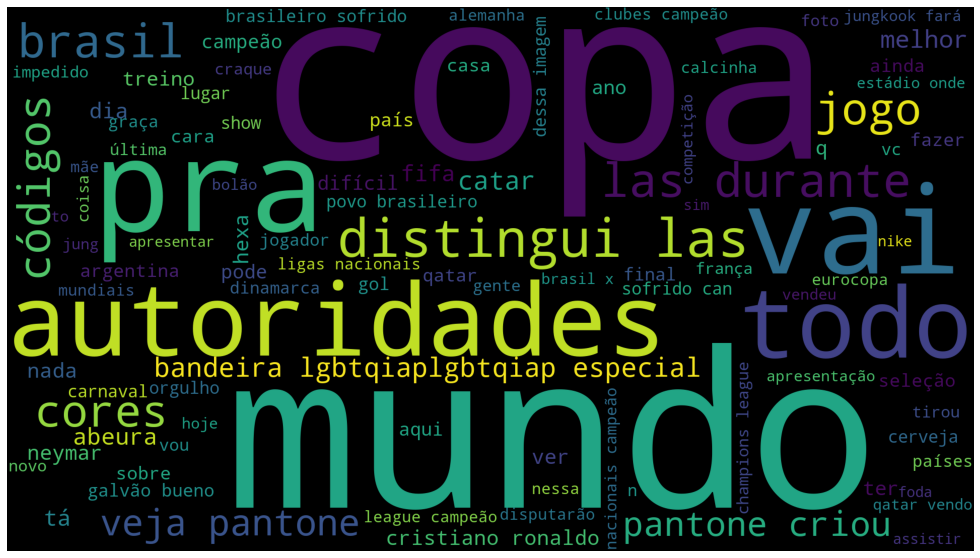

In [19]:
stops = stopwords.words('portuguese')                               # Criando uma variável com as Stop Word em português. Se for utilizar tweets em inglês basta modificar 'portuguese' para 'english'
stops.append('futebol')                                             # Pode ser interessante retirar a palavra utilizada na pesquisa
plt.figure(figsize=(20, 10))                                        # Cria a figura e defini o tamanho dela (largura, altura)

while True:
    try:      # Este try/except foi colocado para tratar os erros que aparecem quando interrompemos o processo
        words = spark.read.csv('.\csv', encoding='utf-8')          # Lendo o conjunto de arquivos CSV na pasta /csv
        words = trata_tweets(words)                                 # Aplicando nossa função de tratamento
        rows = words.collect()                                      # Transformando o DataFrame em uma lista de linhas [1]
        all_words = ''
        for row in rows:
            all_words = all_words + ' ' + row['word']

        wordcloud = WordCloud(stopwords=stops,
                              background_color="black",
                              width=1920,
                              height=1080,
                              max_words=100
                              ).generate(all_words)                 # Word cloud simples. Mais detalhes em [2]

        plt.cla()                                                   # Limpa os eixos do gráfico
        plt.axis('off')                                             # Oculta as marcações dos eixos
        plt.imshow(wordcloud)                                       # Utilizado para exibir os dados como uma imagem
        plt.savefig("twitter.png", format="png")
        display.display(plt.gcf())                                  # Mostrando a nossa word cloud no output do notebook
        display.clear_output(wait=True)                             # Limpa o output do notebook
        time.sleep(5)
    except KeyboardInterrupt:
        break